In [1]:
import pandas as pd
import pyreadstat
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df, meta = pyreadstat.read_dta("Bases_Tratadas\\Churches_USA_Data.dta")

In [3]:
df['fipsmerg'] = df['fipsmerg_original']
df['grpname_reltrad'] = df.apply(lambda row: f"{row['grpname']} ({int(row['reltrad'])})", axis=1)

dicio = dict({1: 'Evangelicals',
             2: 'Mainlines',
             3: 'Catholic'})

df['reltrad_name'] = df.apply(lambda row: dicio[int(row['reltrad'])], axis=1)

df['grpname_reltradname'] = df.apply(lambda row: f"{row['grpname']} ({row['reltrad_name']})", axis=1)
df['grpcode'] = df['grpcode'].astype(int)

In [20]:
df[df.year==1980].congreg.sum()

277575.0

# Templos por reltrad

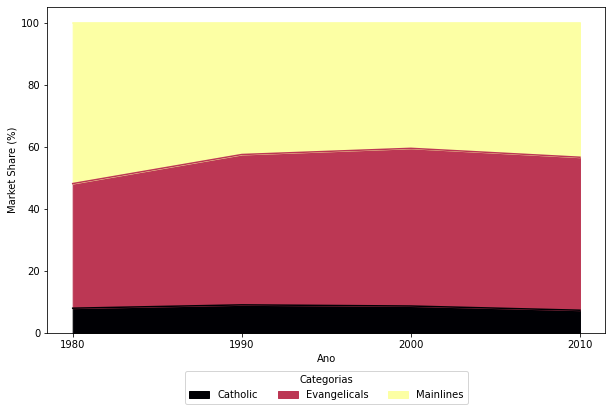

In [10]:
grouped = df.groupby(['year', 'reltrad_name'])['congreg'].sum().unstack().fillna(0)

# Calcular o market share (percentual do total de templos para cada ano)
market_share = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Plotar o gráfico de área empilhada 100%
market_share.plot(kind='area', stacked=True, figsize=(10, 6), cmap='inferno')
# plt.title('Evolution of Market Share (Number of Temples) of Churches')
plt.xlabel('Ano')
plt.xticks([1980, 1990, 2000, 2010])
plt.ylabel('Market Share (%)')
plt.legend(title='Categorias', bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=3)
plt.show()

# Membros por reltrad

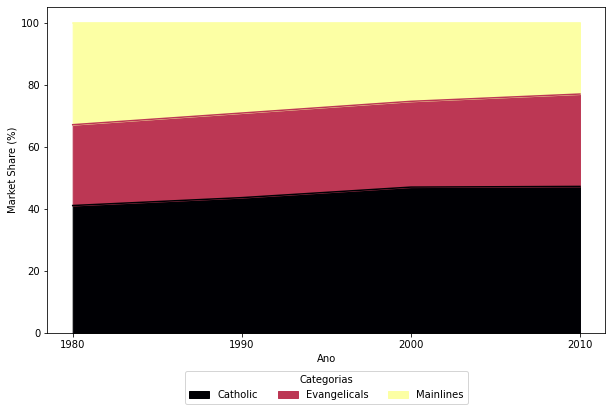

In [11]:
grouped = df.groupby(['year', 'reltrad_name'])['adherent'].sum().unstack().fillna(0)

# Calcular o market share (percentual do total de templos para cada ano)
market_share = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Plotar o gráfico de área empilhada 100%
market_share.plot(kind='area', stacked=True, figsize=(10, 6), cmap='inferno')
# plt.title('Evolution of Market Share (Number of Members) of Churches')
plt.xlabel('Ano')
plt.xticks([1980, 1990, 2000, 2010])
plt.ylabel('Market Share (%)')
plt.legend(title='Categorias', bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=3)
plt.show()

# Evolução número de templos USA

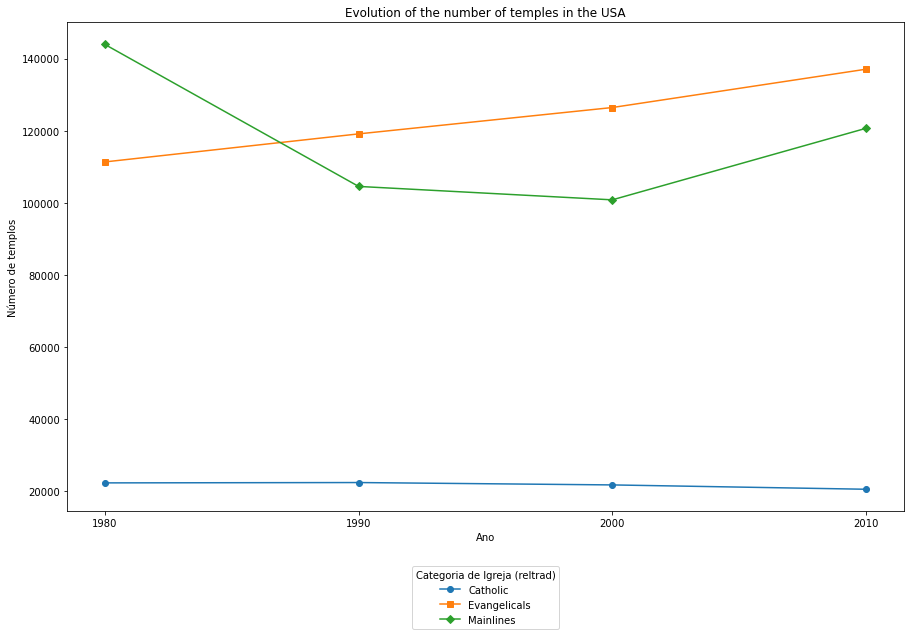

In [12]:
grouped = df.groupby(['year', 'reltrad_name'])['congreg'].sum().unstack().fillna(0)

# Definir um conjunto de marcadores diferentes
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h']

# Plotar o gráfico de linha com marcadores diferentes
plt.figure(figsize=(15, 9))
for i, column in enumerate(grouped.columns):
    plt.plot(grouped.index, grouped[column], marker=markers[i % len(markers)], label=column)

# Plotar o gráfico de área empilhada 100%
# grouped.plot(kind='line', figsize=(15, 9), cmap='inferno')
plt.title(f'Evolution of the number of temples in the USA')
plt.xlabel('Ano')
plt.ylabel('Número de templos')
plt.xticks([1980, 1990, 2000, 2010])
plt.legend(title='Categoria de Igreja (reltrad)', loc='lower center', bbox_to_anchor=(0.5, -0.25))
plt.show()

# Maiores denominações por número de templos

In [13]:
grouped = df.groupby(['year', 'grpcode'], as_index=False)['congreg'].sum()

grouped_sorted = grouped.sort_values(by=['year', 'congreg'], ascending=[True, False])
grouped_sorted.reset_index(inplace=True)

top_7_each_year = grouped_sorted.groupby('year').head(7)

df_top7 = df[df['grpcode'].isin(list(top_7_each_year.grpcode.value_counts().index)[:7])]

# Avaliando counties mais populosos

In [14]:
counties = df[['year','fipsmerg','cntynm','stateab','totpop']]
counties.drop_duplicates(inplace=True)
counties = counties.sort_values(by=['year', 'totpop'], ascending=[True, False])

top_10_each_year = counties.groupby('year').head(10)
top_10_each_year.reset_index(inplace=True, drop=True)
df_top10_counties = df[df['fipsmerg'].isin(top_10_each_year['fipsmerg'])]
df_top10_counties_top7grp = df[df['grpcode'].isin(list(top_7_each_year.grpcode.value_counts().index)[:7])]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


# Plot Market Shares para 6 counties mais populosos

In [15]:
# cnty = top_10_each_year['fipsmerg'][10]
# cnty_name = counties[counties.fipsmerg==cnty].cntynm.iloc[0]
# estado = counties[counties.fipsmerg==cnty].stateab.iloc[0]
# grouped = df_top10_counties_top7grp[df_top10_counties_top7grp['fipsmerg']==cnty].groupby(['year', 'grpname'])['congreg'].sum().unstack().fillna(0)

# # Calcular o market share (percentual do total de templos para cada ano)
# market_share = grouped.div(grouped.sum(axis=1), axis=0) * 100

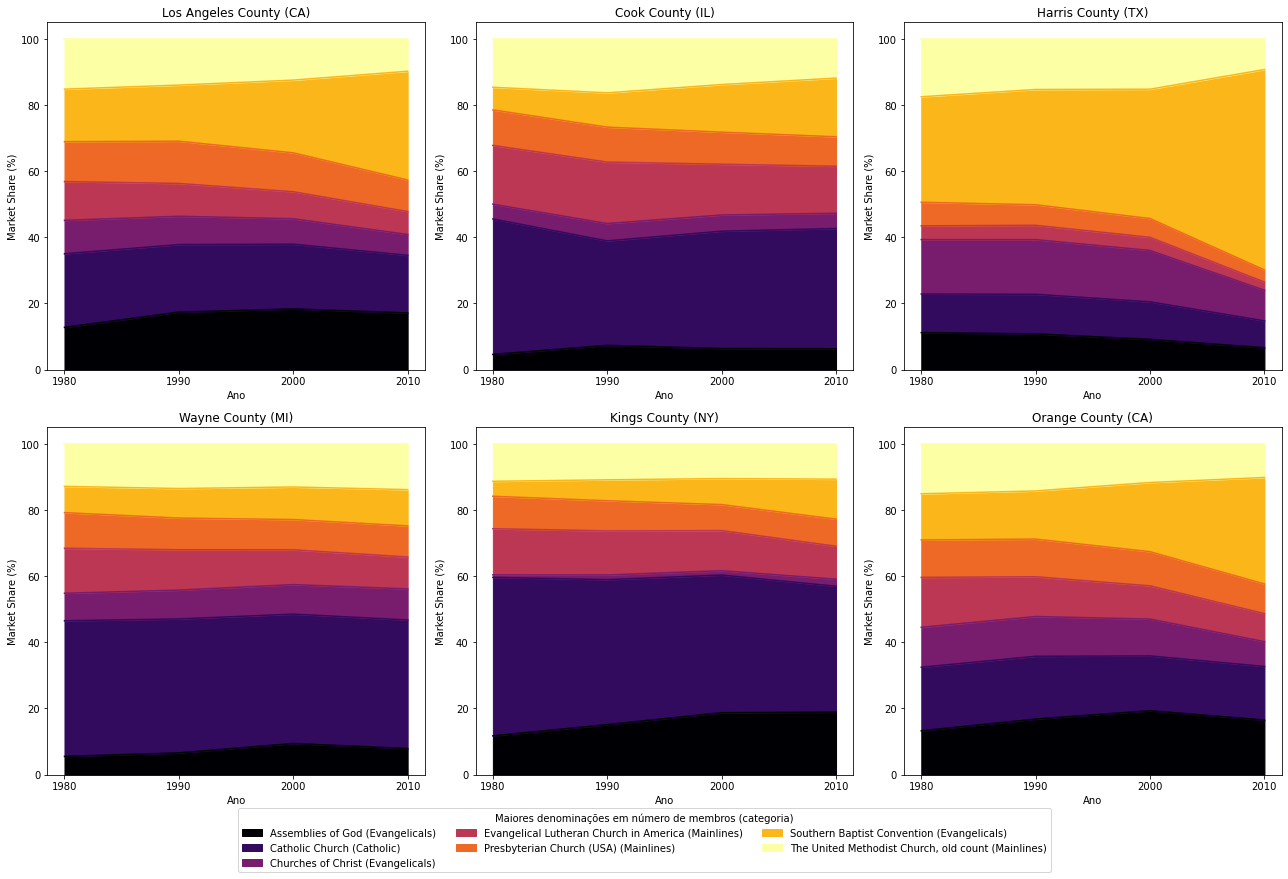

In [17]:
# Criar uma figura com 6 subplots (2 linhas x 3 colunas)
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Variável para armazenar as legendas
handles, labels = None, None

# Iterar sobre os subplots e plotar o gráfico de área empilhada em cada um
for i, ax in enumerate(axs.flat):
    
    cnty = top_10_each_year['fipsmerg'][i]
    cnty_name = counties[counties.fipsmerg==cnty].cntynm.iloc[0]
    estado = counties[counties.fipsmerg==cnty].stateab.iloc[0]
    grouped = df_top10_counties_top7grp[df_top10_counties_top7grp['fipsmerg']==cnty].groupby(['year', 'grpname_reltradname'])['congreg'].sum().unstack().fillna(0)

    # Calcular o market share (percentual do total de templos para cada ano)
    market_share = grouped.div(grouped.sum(axis=1), axis=0) * 100
    
    
    market_share.plot(kind='area', stacked=True, ax=ax, cmap='inferno')
    ax.set_title(f'{cnty_name} ({estado})')
    ax.set_xlabel('Ano')
    ax.set_ylabel('Market Share (%)')
#     ax.legend(title='Categoria de Igreja (reltrad)')
    ax.set_xticks([1980, 1990, 2000, 2010])
    
    # Capturar os handles e labels apenas na primeira iteração
    if handles is None and labels is None:
        handles, labels = ax.get_legend_handles_labels()

# Remover as legendas dos subplots
for ax in axs.flat:
    ax.get_legend().remove()
    
fig.legend(handles, labels, title='Maiores denominações em número de membros (categoria)', loc='lower center', bbox_to_anchor=(0.5, -0.07), ncol=3)

        
# Ajustar o layout para que os subplots não se sobreponham
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

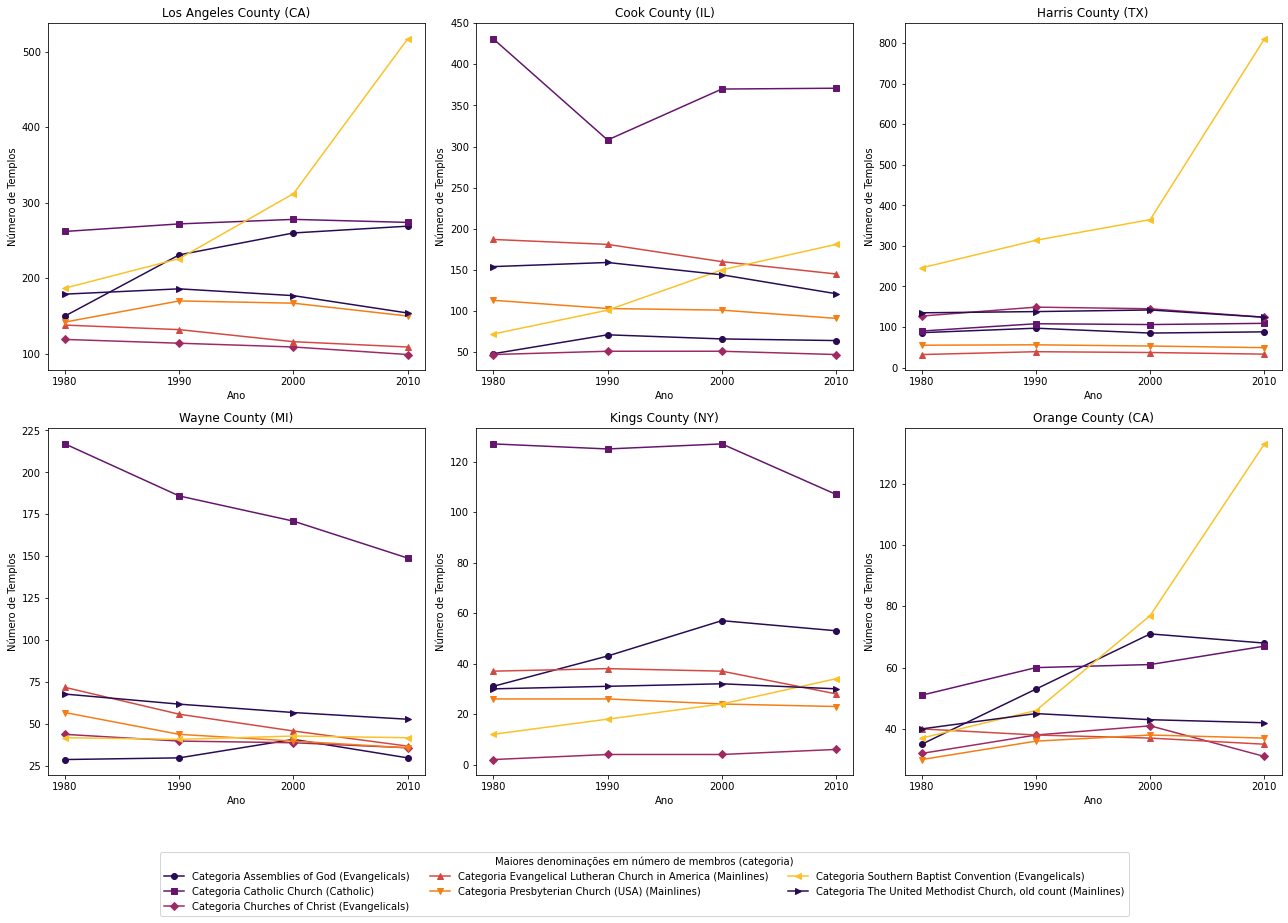

In [18]:
# Criar uma figura com 6 subplots (2 linhas x 3 colunas)
# fig, axs = plt.subplots(3, 2, figsize=(18, 20))
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Variável para armazenar as legendas
handles, labels = None, None

# Marcadores diferentes para as linhas
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h']

# Definir as cores personalizadas
# colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'black', 'gray']
palette = sns.color_palette("inferno", n_colors=6)

# Iterar sobre os subplots e plotar o gráfico de linha em cada um
for i, ax in enumerate(axs.flat):

    cnty = top_10_each_year['fipsmerg'][i]
    cnty_name = counties[counties.fipsmerg==cnty].cntynm.iloc[0]
    estado = counties[counties.fipsmerg==cnty].stateab.iloc[0]
    grouped = df_top10_counties_top7grp[df_top10_counties_top7grp['fipsmerg']==cnty].groupby(['year', 'grpname_reltradname'])['congreg'].sum().unstack().fillna(0)
    
    for j, (column_name, column_data) in enumerate(grouped.iteritems()):
        ax.plot(column_data.index, column_data.values, label=f'Categoria {column_name}', marker=markers[j % len(markers)], color=palette[j % len(palette)], linestyle='-')
  
    # Plotar o gráfico de linha
#     line_plot = grouped.plot(kind='line', ax=ax, cmap='inferno')
    ax.set_title(f'{cnty_name} ({estado})')
    ax.set_xlabel('Ano')
    ax.set_ylabel('Número de Templos')
    
    # Definir os ticks do eixo x
    ax.set_xticks([1980, 1990, 2000, 2010])
    
    # Capturar os handles e labels apenas na primeira iteração
    if handles is None and labels is None:
        handles, labels = ax.get_legend_handles_labels()

# Remover as legendas dos subplots
# for ax in axs.flat:
#     ax.get_legend().remove()

# Adicionar a legenda global
fig.legend(handles, labels, title='Maiores denominações em número de membros (categoria)', loc='lower center', bbox_to_anchor=(0.5, -0.12), ncol=3)

# Ajustar o layout para que os subplots não se sobreponham
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Visualização por county

In [12]:
# cnty = 1836
# cnty_name = counties[counties.fipsmerg==cnty].cntynm.iloc[0]
# estado = counties[counties.fipsmerg==cnty].stateab.iloc[0]
# grouped = df_top10_counties_top7grp[df_top10_counties_top7grp['fipsmerg']==cnty].groupby(['year', 'grpname_reltrad'])['congreg'].sum().unstack().fillna(0)

# # # Calcular o market share (percentual do total de templos para cada ano)
# # market_share = grouped.div(grouped.sum(axis=1), axis=0) * 100

# # Plotar o gráfico de área empilhada 100%
# grouped.plot(kind='line', figsize=(15, 9), cmap='inferno')
# plt.title(f'{cnty_name} ({estado}) {cnty}')
# plt.xlabel('Ano')
# plt.ylabel('Número de templos')
# plt.legend(title='Categoria de Igreja (reltrad)', loc='lower center', bbox_to_anchor=(0.5, -0.45))
# plt.show()

In [13]:
# palette = sns.color_palette("cividis", n_colors=9)
# palette